In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('../data/airlines_customer_booking_dataset.csv', encoding='ISO-8859-1')
print(df.head())
print(df.info())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [71]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [72]:
#number of bookings by sales channel
booking_count_by_channel = df["sales_channel"].value_counts()
print(booking_count_by_channel)

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


In [73]:
#average number of passengers by trip type
avg_passengers_by_trip = df.groupby("trip_type")["num_passengers"].mean()
print(avg_passengers_by_trip)

trip_type
CircleTrip    1.568966
OneWay        1.565891
RoundTrip     1.591490
Name: num_passengers, dtype: float64


In [74]:
#the top 5 most booked routes
top_routes = df["route"].value_counts().nlargest(10)
print(top_routes)

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64


In [75]:
#average length of stay grouped by booking origin country
avg_stay_by_origin = df.groupby("booking_origin")["length_of_stay"].mean()
print(avg_stay_by_origin)

booking_origin
(not set)               17.083333
Afghanistan              2.000000
Algeria                  6.000000
Argentina               27.333333
Australia               29.186381
                          ...    
United Arab Emirates    26.285714
United Kingdom          23.895954
United States           18.440789
Vanuatu                  4.000000
Vietnam                 32.917526
Name: length_of_stay, Length: 104, dtype: float64


In [76]:
#total number of completed bookings
completed_bookings = len(df[df["booking_complete"] == 1])
print(f"Completed Bookings: {completed_bookings}")

Completed Bookings: 7478


In [77]:
#average flight duration by flight departure hour
avg_duration_by_hour = df.groupby("flight_hour")["flight_duration"].mean()
print(avg_duration_by_hour)

flight_hour
0     7.633613
1     7.366400
2     7.266556
3     7.215721
4     7.184879
5     7.260915
6     7.271757
7     7.277738
8     7.262622
9     7.346718
10    7.412269
11    7.458823
12    7.349845
13    7.135692
14    7.001825
15    6.881746
16    6.923924
17    7.067956
18    6.919909
19    7.466983
20    7.696630
21    7.938483
22    7.878618
23    7.913803
Name: flight_duration, dtype: float64


In [78]:
#number of bookings by flight day
booking_count_by_day = df["flight_day"].value_counts()
print(booking_count_by_day)

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64


In [79]:
#maximum number of passengers in a single booking
max_passengers = df["num_passengers"].max()
print(f"Max Passengers: {max_passengers}")

Max Passengers: 9


In [80]:
#average purchase lead time by trip type
avg_lead_by_trip = df.groupby("trip_type")["purchase_lead"].mean()
print(avg_lead_by_trip)

trip_type
CircleTrip    95.293103
OneWay        91.547804
RoundTrip     84.864557
Name: purchase_lead, dtype: float64


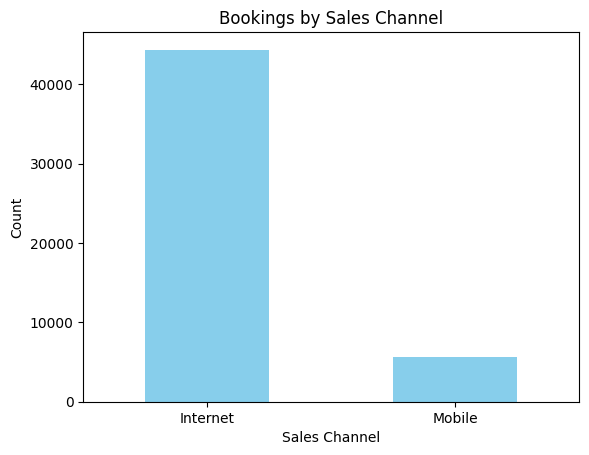

In [81]:
df["sales_channel"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Bookings by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

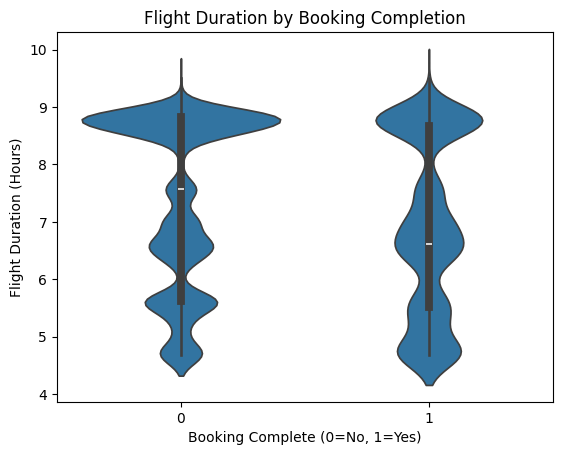

In [82]:
sns.violinplot(x="booking_complete", y="flight_duration", data=df)
plt.title("Flight Duration by Booking Completion")
plt.xlabel("Booking Complete (0=No, 1=Yes)")
plt.ylabel("Flight Duration (Hours)")
plt.show()

In [83]:
#total number of bookings that requested extra baggage
extra_baggage_count = len(df[df["wants_extra_baggage"] == 1])
print(f"Bookings with Extra Baggage: {extra_baggage_count}")

Bookings with Extra Baggage: 33439


In [84]:
#average stay duration by route
avg_stay_by_route = df.groupby("route")["length_of_stay"].mean()
print(avg_stay_by_route)

route
AKLDEL    32.700000
AKLHGH    17.000000
AKLHND    17.500000
AKLICN    27.828571
AKLKIX    73.750000
            ...    
TRZWUH    61.615385
TRZXIY    49.666667
TWUWUH     4.500000
TWUXIY    22.571429
URTXIY     5.000000
Name: length_of_stay, Length: 799, dtype: float64


In [85]:
#number of bookings by booking origin country
origin_count = df["booking_origin"].value_counts()
print(origin_count)

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64


In [86]:
#average flight duration by trip type
avg_duration_by_trip = df.groupby("trip_type")["flight_duration"].mean()
print(avg_duration_by_trip)

trip_type
CircleTrip    7.764828
OneWay        7.966770
RoundTrip     7.271030
Name: flight_duration, dtype: float64


In [87]:
#top 5 days with the highest number of bookings
top_days = df["flight_day"].value_counts().nlargest(5)
print(top_days)

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Name: count, dtype: int64


In [88]:
#average number of passengers in completed bookings
avg_passengers_completed = df[df["booking_complete"] == 1]["num_passengers"].mean()
print(f"Avg Passengers in Completed Bookings: {avg_passengers_completed:.2f}")

Avg Passengers in Completed Bookings: 1.65


In [89]:
#bookings with in-flight meal requests
meal_count = len(df[df["wants_in_flight_meals"] == 1])
print(f"Bookings with In-Flight Meals: {meal_count}")

Bookings with In-Flight Meals: 21357


In [90]:
#minimum flight duration by route
min_duration_by_route = df.groupby("route")["flight_duration"].min()
print(min_duration_by_route)

route
AKLDEL    5.52
AKLHGH    5.07
AKLHND    7.57
AKLICN    6.62
AKLKIX    7.00
          ... 
TRZWUH    5.13
TRZXIY    5.00
TWUWUH    5.13
TWUXIY    5.00
URTXIY    5.00
Name: flight_duration, Length: 799, dtype: float64


In [91]:
#average number of passengers by flight departure hour
avg_passengers_by_hour = df.groupby("flight_hour")["num_passengers"].mean()
print(avg_passengers_by_hour)

flight_hour
0     1.547758
1     1.573480
2     1.541635
3     1.589077
4     1.573338
5     1.575588
6     1.568852
7     1.570697
8     1.610111
9     1.602171
10    1.580875
11    1.588424
12    1.589314
13    1.581748
14    1.656195
15    1.675470
16    1.658317
17    1.707317
18    1.640091
19    1.522034
20    1.539855
21    1.521851
22    1.518135
23    1.547667
Name: num_passengers, dtype: float64


In [92]:
#total bookings requesting preferred seat
preferred_seat_count = len(df[df["wants_preferred_seat"] == 1])
print(f"Bookings with Preferred Seat: {preferred_seat_count}")

Bookings with Preferred Seat: 14848


In [93]:
#average purchase lead by booking origin
avg_lead_by_origin = df.groupby("booking_origin")["purchase_lead"].mean()
print(avg_lead_by_origin)

booking_origin
(not set)                80.035714
Afghanistan             191.000000
Algeria                  27.000000
Argentina                80.333333
Australia                78.579622
                           ...    
United Arab Emirates     55.928571
United Kingdom           78.624277
United States            69.554825
Vanuatu                  11.000000
Vietnam                  69.422680
Name: purchase_lead, Length: 104, dtype: float64


In [94]:
#maximum number of passengers in a completed booking
max_passengers_completed = df[df["booking_complete"] == 1]["num_passengers"].max()
print(f"Max Passengers in Completed Booking: {max_passengers_completed}")

Max Passengers in Completed Booking: 9


In [95]:
#average flight duration for incomplete bookings
avg_duration_incomplete = df[df["booking_complete"] == 0]["flight_duration"].mean()
print(f"Avg Duration in Incomplete Bookings: {avg_duration_incomplete:.2f} hours")

Avg Duration in Incomplete Bookings: 7.34 hours


In [96]:
#average number of passengers in bookings with extra baggage
avg_passengers_with_baggage = df[df["wants_extra_baggage"] == 1]["num_passengers"].mean()
print(f"Avg Passengers with Extra Baggage: {avg_passengers_with_baggage:.2f}")

Avg Passengers with Extra Baggage: 1.68


In [97]:
#top 10 countries with highest number of completed bookings
completed_by_origin = df[df["booking_complete"] == 1].groupby("booking_origin")["booking_complete"].count().nlargest(10)
print(completed_by_origin)

booking_origin
Malaysia       2468
Australia       900
China           694
Indonesia       615
Japan           478
Thailand        470
South Korea     462
Singapore       299
Taiwan          224
India           131
Name: booking_complete, dtype: int64


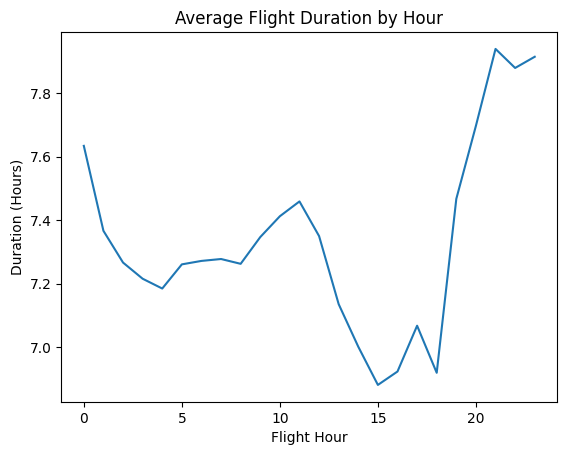

In [98]:
df.groupby("flight_hour")["flight_duration"].mean().plot(kind="line")
plt.title("Average Flight Duration by Hour")
plt.xlabel("Flight Hour")
plt.ylabel("Duration (Hours)")
plt.show()

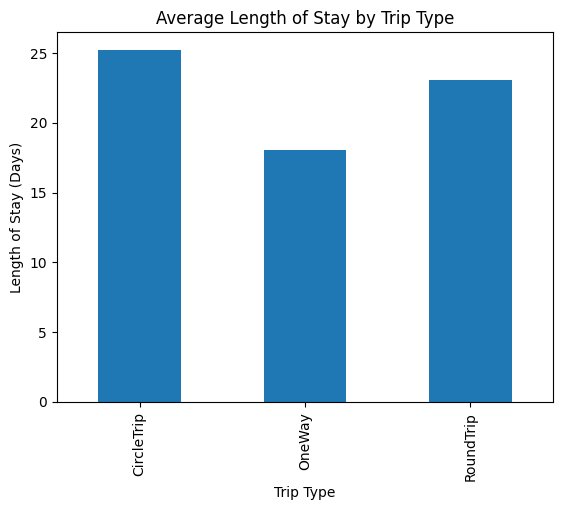

In [99]:
df.groupby("trip_type")["length_of_stay"].mean().plot(kind="bar")
plt.title("Average Length of Stay by Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Length of Stay (Days)")
plt.show()

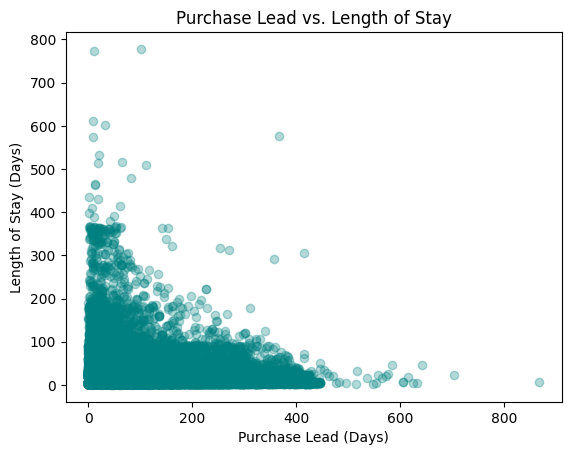

In [100]:
plt.scatter(df["purchase_lead"], df["length_of_stay"], alpha=0.3, color="teal")
plt.title("Purchase Lead vs. Length of Stay")
plt.xlabel("Purchase Lead (Days)")
plt.ylabel("Length of Stay (Days)")
plt.show()

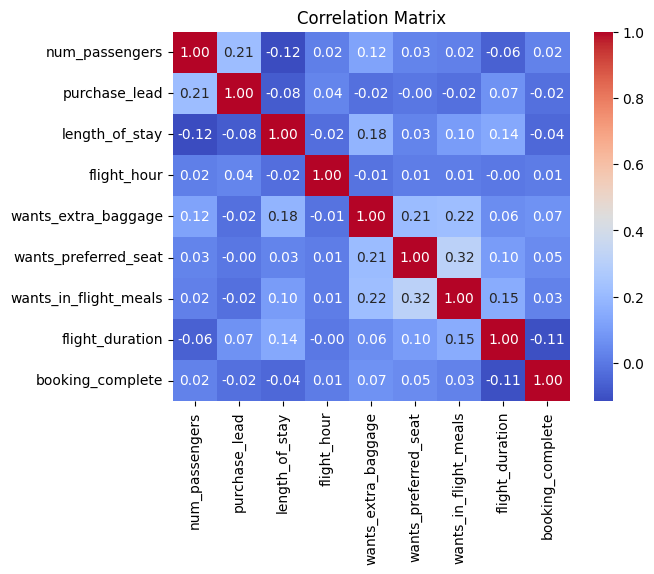

In [101]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()